In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('datasets/index2018.csv')

## Checkpointing

In [3]:
data=df.copy()


data.date=pd.to_datetime(data.date,dayfirst=True)

data.head()

data.set_index(data.date,inplace=True)

del data['date']

### checkpointing for using only data for spx

In [6]:
spx_price=data.spx

In [11]:
spx_price.isna().sum()

0

## Setting the desired frequency 

In [15]:
#setting the desired frequency to the business days.
spx_price=spx_price.asfreq('b')
spx_price.isna().sum()

8

### Filling the missing values

In [17]:
spx_price=spx_price.fillna(method="ffill")
spx_price.isna().sum()

0

## Quantile-Quantile model

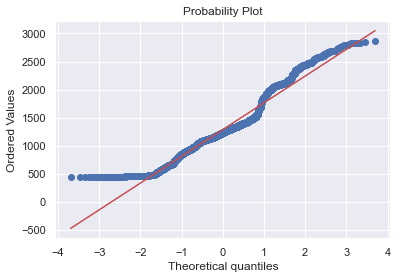

In [18]:
import scipy.stats 

scipy.stats.probplot(spx_price,plot=plt)
plt.plot()
plt.show()

## Plotting the SPX price returns

In [20]:
spx_returns=spx_price.pct_change()
spx_returns=spx_returns.dropna()

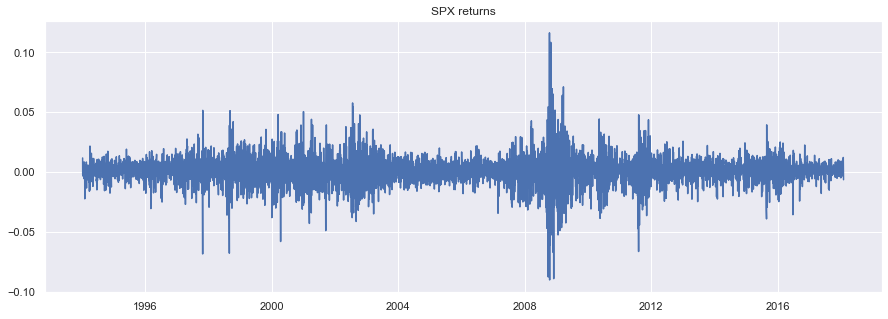

In [22]:
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(spx_returns)
plt.title('SPX returns')
plt.show()

### Autocorrelation

In [23]:
#importing the required package
import statsmodels.graphics.tsaplots as sgt

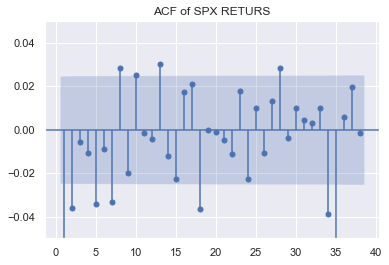

In [34]:
sgt.plot_acf(spx_returns,zero=False)
plt.ylim(-0.05,0.05)
plt.title('ACF of SPX RETURS')
plt.show()

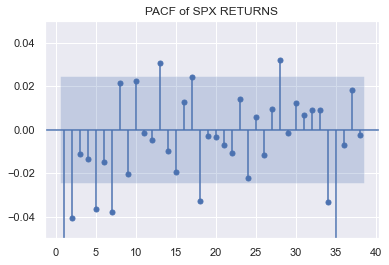

In [33]:
sgt.plot_pacf(spx_returns,zero=False,method=('ols'))
plt.title("PACF of SPX RETURNS")
plt.ylim(-0.05,0.05)
plt.show()

## ARMA MODEL(FOR SPX RETURNS)

In [35]:
from statsmodels.tsa.arima_model import ARMA

In [37]:
model_return_ar_1_ma_1=ARMA(spx_returns,order=(1,1))
result_return_ar_1_ma_1=model_return_ar_1_ma_1.fit()
print(result_return_ar_1_ma_1.summary())


C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(1, 1)   Log Likelihood               19243.747
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38479.493
Time:                        15:37:49   BIC                         -38452.515
Sample:                    01-10-1994   HQIC                        -38470.146
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      3.017      0.003       0.000       0.001
ar.L1.spx      0.6370      0.086      7.449      0.000       0.469       0.805
ma.L1.spx     -0.7031      0.079     -8.908      0.0

In [47]:
model_return_ar_2_ma_1=ARMA(spx_returns,order=(2,1))
result_return_ar_2_ma_1=model_return_ar_2_ma_1.fit()
print(result_return_ar_2_ma_1.summary())


C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(2, 1)   Log Likelihood               19244.164
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38478.329
Time:                        15:45:39   BIC                         -38444.606
Sample:                    01-10-1994   HQIC                        -38466.645
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      3.046      0.002       0.000       0.001
ar.L1.spx      0.6885      0.087      7.898      0.000       0.518       0.859
ar.L2.spx      0.0153      0.017      0.909      0.3

In [45]:
model_return_ar_7_ma_13=ARMA(spx_returns,order=(7,13))
result_return_ar_7_ma_13=model_return_ar_7_ma_13.fit(start_ar_lags=30)
print(result_return_ar_7_ma_13.summary())

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings

                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                    ARMA(7, 13)   Log Likelihood               19271.833
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38499.665
Time:                        15:43:08   BIC                         -38351.286
Sample:                    01-10-1994   HQIC                        -38448.255
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.930      0.003       0.000       0.001
ar.L1.spx     -0.2562        nan        nan        nan         nan         nan
ar.L2.spx     -0.1591        nan        nan        n

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


## LLR Test

In [48]:
from scipy.stats.distributions import chi2
def LLR_test(mod_1,mod_2,DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR,DF).round(3)
    return p

In [51]:
model_return_ar_3_ma_1=ARMA(spx_returns,order=(3,1))
result_return_ar_3_ma_1=model_return_ar_3_ma_1.fit()
print(result_return_ar_3_ma_1.summary())

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(3, 1)   Log Likelihood               19244.383
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38476.766
Time:                        15:58:34   BIC                         -38436.299
Sample:                    01-10-1994   HQIC                        -38462.745
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      3.055      0.002       0.000       0.001
ar.L1.spx      0.7239      0.097      7.430      0.000       0.533       0.915
ar.L2.spx      0.0131      0.017      0.763      0.4

In [64]:
model_return_ar_1_ma_2=ARMA(spx_returns,order=(1,2))
result_return_ar_1_ma_2=model_return_ar_1_ma_2.fit()
print(result_return_ar_1_ma_2.summary())

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(1, 2)   Log Likelihood               19244.179
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38478.358
Time:                        16:03:45   BIC                         -38444.636
Sample:                    01-10-1994   HQIC                        -38466.674
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      3.048      0.002       0.000       0.001
ar.L1.spx      0.7146      0.102      7.025      0.000       0.515       0.914
ma.L1.spx     -0.7865      0.103     -7.652      0.0

In [66]:
model_return_ar_1_ma_3=ARMA(spx_returns,order=(1,3))
result_return_ar_1_ma_3=model_return_ar_1_ma_3.fit(start_ar_lags=10)
print(result_return_ar_1_ma_3.summary())

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(1, 3)   Log Likelihood               19244.326
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38476.651
Time:                        16:04:35   BIC                         -38436.184
Sample:                    01-10-1994   HQIC                        -38462.630
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      3.053      0.002       0.000       0.001
ar.L1.spx      0.7516      0.118      6.362      0.000       0.520       0.983
ma.L1.spx     -0.8231      0.119     -6.938      0.0

In [90]:
model_return_ar_4_ma_5=ARMA(spx_returns,order=(4,5))
result_return_ar_4_ma_5=model_return_ar_4_ma_5.fit(start_ar_lags=10)
print(result_return_ar_4_ma_5.summary())

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(4, 5)   Log Likelihood               19258.018
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38494.036
Time:                        16:46:41   BIC                         -38419.847
Sample:                    01-10-1994   HQIC                        -38468.331
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.839      0.005       0.000       0.001
ar.L1.spx      0.1690      0.112      1.505      0.132      -0.051       0.389
ar.L2.spx      1.1926      0.109     10.970      0.0

In [84]:
model_return_ar_7_ma_5=ARMA(spx_returns,order=(7,5))
result_return_ar_7_ma_5=model_return_ar_7_ma_5.fit(start_ar_lags=18)
print(result_return_ar_7_ma_5.summary())

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(7, 5)   Log Likelihood               19262.180
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38496.359
Time:                        16:42:26   BIC                         -38401.936
Sample:                    01-10-1994   HQIC                        -38463.643
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      3.029      0.002       0.000       0.001
ar.L1.spx     -1.0151        nan        nan        nan         nan         nan
ar.L2.spx     -0.4739        nan        nan        n

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


By analysis the different models, i think the best suited to ours is ARMA(4,5),as it has the maximum Log Likelihood and minimum information criteria and all its coefficients has good significance value, as the p value is closer to 0.
So, i use ARMA(4,5) in our model

## Analysing the Residuals

In [91]:
residuals=result_return_ar_4_ma_5.resid

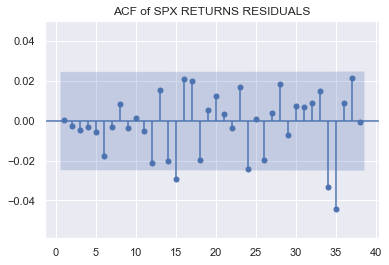

In [92]:
sgt.plot_acf(residuals,zero=False)
plt.ylim(-0.059,0.05)
plt.title("ACF of SPX RETURNS RESIDUALS")
plt.show()

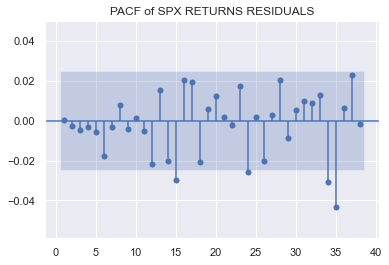

In [93]:
sgt.plot_pacf(residuals,zero=False)
plt.ylim(-0.059,0.05)
plt.title("PACF of SPX RETURNS RESIDUALS")
plt.show()

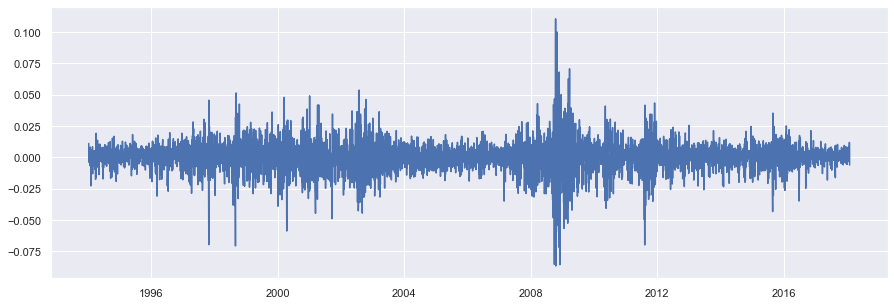

In [89]:
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(residuals)
plt.show()